In [2]:
#import libraries

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib

In [4]:
# Read in the data

df = pd.read_csv(r'C:\Data\Portfolio\TopCollege\forbesamericastopcolleges2019.csv')

In [5]:
df.head()

,Rank,Name,City,State,Public/Private,Undergraduate Population,Student Population,Net Price,Average Grant Aid,Total Annual Cost,Alumni Salary,Acceptance Rate,SAT Lower,SAT Upper,ACT Lower,ACT Upper,Website
0,1.0,Harvard University,Cambridge,MA,Private,13844.0,31120.0,14327.0,49870.0,69600.0,146800.0,5.0,1460.0,1590.0,32.0,35.0,www.harvard.edu
1,2.0,Stanford University,Stanford,CA,Private,8402.0,17534.0,13261.0,50134.0,69109.0,145200.0,5.0,1390.0,1540.0,32.0,35.0,www.stanford.edu
2,3.0,Yale University,New Haven,CT,Private,6483.0,12974.0,18627.0,50897.0,71290.0,138300.0,7.0,1460.0,1580.0,32.0,35.0,www.yale.edu
3,4.0,Massachusetts Institute of Technology,Cambridge,MA,Private,4680.0,11466.0,20771.0,43248.0,67430.0,155200.0,7.0,1490.0,1570.0,33.0,35.0,web.mit.edu
4,5.0,Princeton University,Princeton,NJ,Private,5659.0,8273.0,9327.0,48088.0,66150.0,139400.0,6.0,1430.0,1570.0,31.0,35.0,www.princeton.edu


In [6]:
# Check for missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

Rank - 0.0%
Name - 0.0%
City - 0.004615384615384616%
State - 0.0%
Public/Private - 0.0%
Undergraduate Population - 0.0%
Student Population - 0.0%
Net Price - 0.003076923076923077%
Average Grant Aid - 0.006153846153846154%
Total Annual Cost - 0.0%
Alumni Salary - 0.023076923076923078%
Acceptance Rate - 0.003076923076923077%
SAT Lower - 0.1523076923076923%
SAT Upper - 0.1523076923076923%
ACT Lower - 0.14923076923076922%
ACT Upper - 0.14923076923076922%
Website - 0.007692307692307693%


In [9]:
df.dtypes

Rank                        float64
Name                         object
City                         object
State                        object
Public/Private               object
Undergraduate Population    float64
Student Population          float64
Net Price                   float64
Average Grant Aid           float64
Total Annual Cost           float64
Alumni Salary               float64
Acceptance Rate             float64
SAT Lower                   float64
SAT Upper                   float64
ACT Lower                   float64
ACT Upper                   float64
Website                      object
dtype: object

In [20]:
#Clearing nulls and changing dtypes to integers

df.fillna(0, inplace=True)
df = df.astype({'Rank':'int', 'Undergraduate Population':'int', 'Student Population':'int', 'Net Price':'int', 'Average Grant Aid':'int', 'Total Annual Cost':'int', 'Alumni Salary':'int', 'Acceptance Rate':'int', 'SAT Lower':'int', 'SAT Upper':'int', 'ACT Lower':'int', 'ACT Upper':'int'})

In [21]:
#Verifying dtype change
df.dtypes

Rank                         int32
Name                        object
City                        object
State                       object
Public/Private              object
Undergraduate Population     int32
Student Population           int32
Net Price                    int32
Average Grant Aid            int32
Total Annual Cost            int32
Alumni Salary                int32
Acceptance Rate              int32
SAT Lower                    int32
SAT Upper                    int32
ACT Lower                    int32
ACT Upper                    int32
Website                     object
dtype: object

In [30]:
#Verifying dtype change

df.sort_values(by=['Rank'], inplace=True, ascending=True)
df.head()

,Rank,Name,City,State,Public/Private,Undergraduate Population,Student Population,Net Price,Average Grant Aid,Total Annual Cost,Alumni Salary,Acceptance Rate,SAT Lower,SAT Upper,ACT Lower,ACT Upper,Website
0,1,Harvard University,Cambridge,MA,Private,13844,31120,14327,49870,69600,146800,5,1460,1590,32,35,www.harvard.edu
1,2,Stanford University,Stanford,CA,Private,8402,17534,13261,50134,69109,145200,5,1390,1540,32,35,www.stanford.edu
2,3,Yale University,New Haven,CT,Private,6483,12974,18627,50897,71290,138300,7,1460,1580,32,35,www.yale.edu
3,4,Massachusetts Institute of Technology,Cambridge,MA,Private,4680,11466,20771,43248,67430,155200,7,1490,1570,33,35,web.mit.edu
4,5,Princeton University,Princeton,NJ,Private,5659,8273,9327,48088,66150,139400,6,1430,1570,31,35,www.princeton.edu


In [31]:
#Sorted by total annual cost

df.sort_values(by=['Total Annual Cost'], inplace=False, ascending=False)

,Rank,Name,City,State,Public/Private,Undergraduate Population,Student Population,Net Price,Average Grant Aid,Total Annual Cost,Alumni Salary,Acceptance Rate,SAT Lower,SAT Upper,ACT Lower,ACT Upper,Website
15,16,University of Chicago,Chicago,IL,Private,6915,16227,25455,37883,75735,114200,9,1480,1580,32,35,www.uchicago.edu
22,23,Harvey Mudd College,Claremont,CA,Private,847,861,34464,33782,74428,158200,15,1470,1570,33,35,www.hmc.edu
13,14,Columbia University,New York,NY,Private,8523,30454,24231,49185,74199,126800,7,1410,1570,31,34,www.columbia.edu
16,17,Northwestern University,Evanston,IL,Private,10163,22008,24047,44247,72980,115400,9,1420,1560,32,34,www.northwestern.edu
90,91,Southern Methodist University,Dallas,TX,Private,6917,11789,32190,33203,72408,110400,49,1270,1440,28,32,www.smu.edu
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,66,United States Merchant Marine Academy,Kings Point,NY,Public,912,975,6758,3597,8646,140700,22,1210,1280,26,28,www.usmma.edu
31,32,United States Military Academy,West Point,NY,Public,4491,4568,0,0,0,144000,10,1185,1400,23,28,www.usma.edu
42,43,United States Air Force Academy,Colorado Springs,CO,Public,4237,4276,0,0,0,138100,12,1210,1390,28,32,www.usafa.af.mil
52,53,United States Coast Guard Academy,New London,CT,Public,896,1044,0,0,0,118100,15,1180,1343,26,31,www.uscga.edu


In [32]:
#Check/clear duplicates

df['Rank'].drop_duplicates()

0        1
1        2
2        3
3        4
4        5
      ... 
645    646
646    647
647    648
648    649
649    650
Name: Rank, Length: 650, dtype: int32

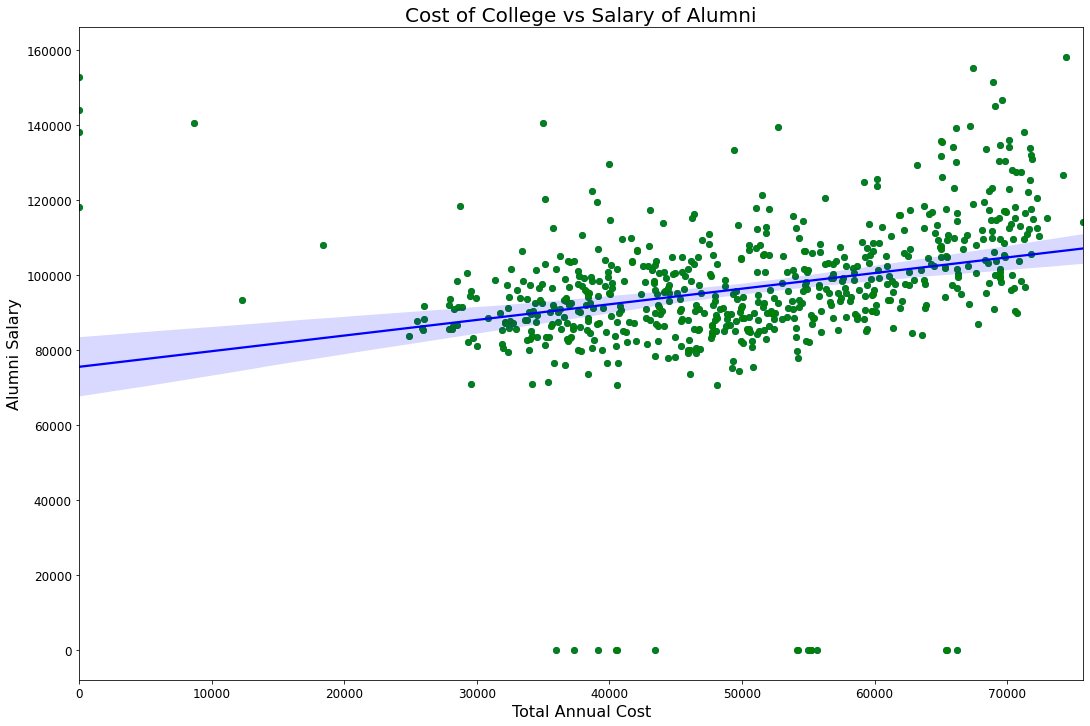

In [47]:
# Scatter plot with budget vs gross

matplotlib.rcParams['figure.figsize'] = (18,12)
plt.scatter(x=df['Total Annual Cost'], y=df['Alumni Salary'])
plt.title('Cost of College vs Salary of Alumni', fontsize=20)
plt.xlabel('Total Annual Cost', fontsize=16)
plt.xticks(fontsize=12)
plt.ylabel('Alumni Salary', fontsize=16)
plt.yticks(fontsize=12)
sns.regplot(x='Total Annual Cost', y='Alumni Salary', data=df, scatter_kws={'color':'green'}, line_kws={'color':'blue'})
plt.show()

In [49]:
#Correlation

df.corr()

,Rank,Undergraduate Population,Student Population,Net Price,Average Grant Aid,Total Annual Cost,Alumni Salary,Acceptance Rate,SAT Lower,SAT Upper,ACT Lower,ACT Upper
Rank,1.000000,-0.060859,-0.133249,-0.324014,-0.421266,-0.552349,-0.595601,0.607478,-0.276487,-0.224188,-0.305566,-0.209521
Undergraduate Population,-0.060859,1.000000,0.977504,-0.410639,-0.522799,-0.347878,0.111778,0.041856,0.141888,0.143799,0.105062,0.121107
Student Population,-0.133249,0.977504,1.000000,-0.355749,-0.443712,-0.267689,0.165278,-0.030513,0.178653,0.175578,0.152981,0.157958
Net Price,-0.324014,-0.410639,-0.355749,1.000000,0.513361,0.717702,0.126104,-0.110692,-0.067195,-0.085015,0.019967,-0.024011
Average Grant Aid,-0.421266,-0.522799,-0.443712,0.513361,1.000000,0.846511,0.175586,-0.499868,0.038516,-0.000004,0.109647,0.036471
Total Annual Cost,-0.552349,-0.347878,-0.267689,0.717702,0.846511,1.000000,0.268652,-0.420283,0.050150,0.009705,0.119455,0.043908
Alumni Salary,-0.595601,0.111778,0.165278,0.126104,0.175586,0.268652,1.000000,-0.410519,0.214186,0.179496,0.229975,0.166525
Acceptance Rate,0.607478,0.041856,-0.030513,-0.110692,-0.499868,-0.420283,-0.410519,1.000000,-0.215598,-0.164119,-0.223592,-0.128226
SAT Lower,-0.276487,0.141888,0.178653,-0.067195,0.038516,0.050150,0.214186,-0.215598,1.000000,0.994548,0.871928,0.867127
SAT Upper,-0.224188,0.143799,0.175578,-0.085015,-0.000004,0.009705,0.179496,-0.164119,0.994548,1.000000,0.861929,0.868725


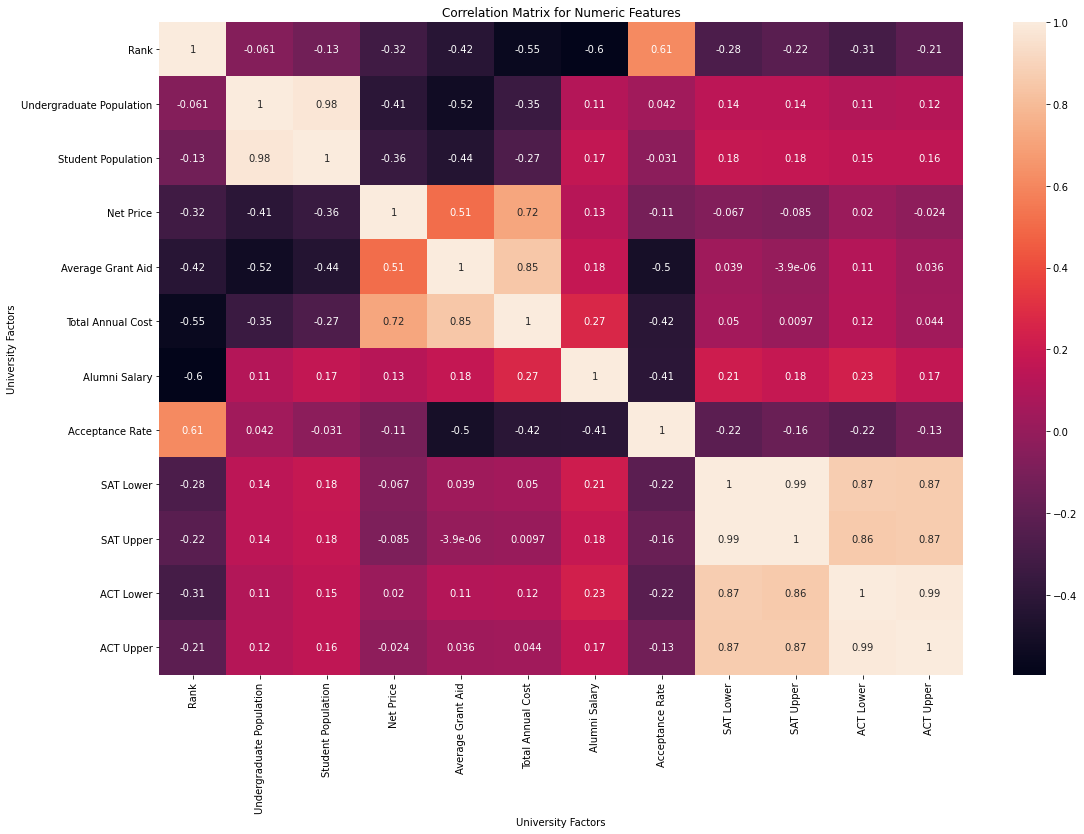

In [50]:
correlation_matrix = df.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('University Factors')
plt.ylabel('University Factors')
plt.show()

In [51]:
#Numerize data for deeper analysis of correlation

df_numerized = df.copy()

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized

,Rank,Name,City,State,Public/Private,Undergraduate Population,Student Population,Net Price,Average Grant Aid,Total Annual Cost,Alumni Salary,Acceptance Rate,SAT Lower,SAT Upper,ACT Lower,ACT Upper,Website
0,1,197,69,19,0,13844,31120,14327,49870,69600,146800,5,1460,1590,32,35,265
1,2,436,406,4,0,8402,17534,13261,50134,69109,145200,5,1390,1540,32,35,483
2,3,648,296,6,0,6483,12974,18627,50897,71290,138300,7,1460,1580,32,35,642
3,4,271,69,19,0,4680,11466,20771,43248,67430,155200,7,1490,1570,33,35,81
4,5,350,339,31,0,5659,8273,9327,48088,66150,139400,6,1430,1570,31,35,415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
645,646,308,234,32,1,13379,14432,8625,9582,34720,96700,64,910,1160,18,23,379
646,647,219,424,15,1,13626,13763,13012,9297,32938,85600,85,900,1110,17,23,288
647,648,156,136,45,0,1094,1226,19340,27155,48100,70700,72,988,1170,19,25,220
648,649,619,28,34,0,488,516,22828,30207,55180,0,80,0,0,0,0,614


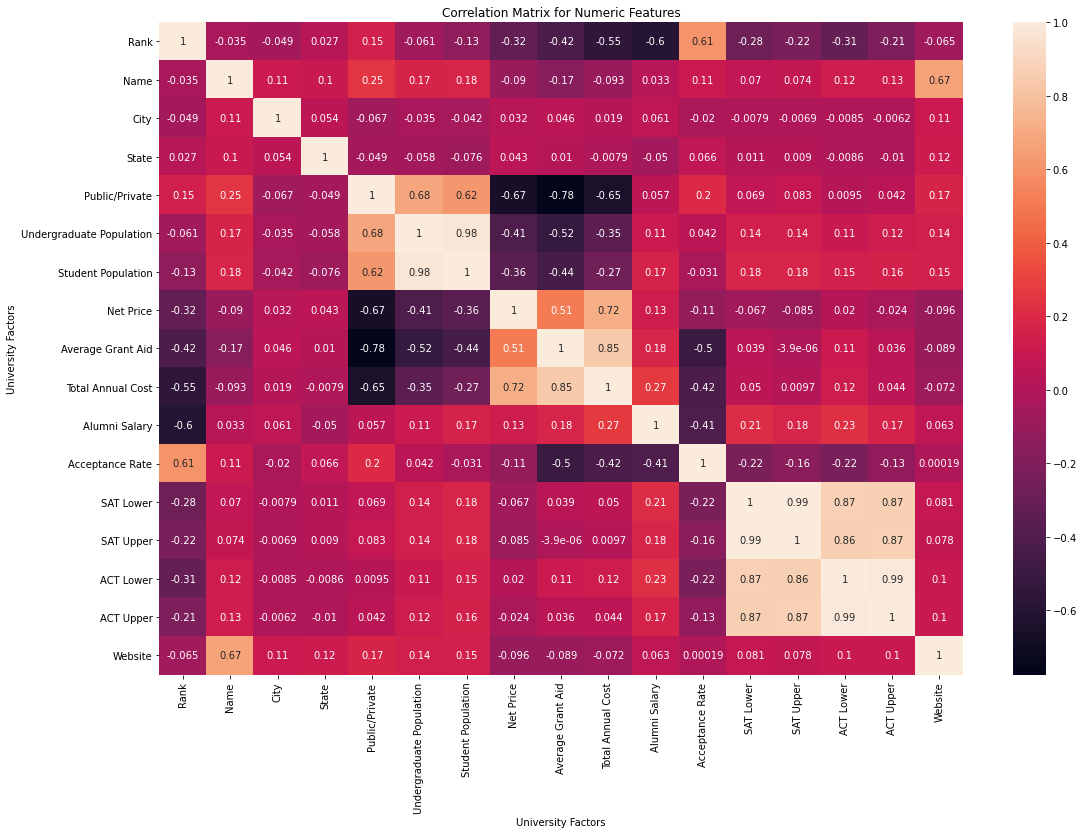

In [52]:
correlation_matrix = df_numerized.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('University Factors')
plt.ylabel('University Factors')
plt.show()

In [60]:
pd.set_option('display.max_rows', 1000)
df_numerized.corr()

,Rank,Name,City,State,Public/Private,Undergraduate Population,Student Population,Net Price,Average Grant Aid,Total Annual Cost,Alumni Salary,Acceptance Rate,SAT Lower,SAT Upper,ACT Lower,ACT Upper,Website
Rank,1.000000,-0.034654,-0.048963,0.027100,0.147599,-0.060859,-0.133249,-0.324014,-0.421266,-0.552349,-0.595601,0.607478,-0.276487,-0.224188,-0.305566,-0.209521,-0.065256
Name,-0.034654,1.000000,0.106191,0.101749,0.250402,0.172807,0.179897,-0.089979,-0.171042,-0.093355,0.033121,0.106868,0.069859,0.074040,0.120856,0.131709,0.667946
City,-0.048963,0.106191,1.000000,0.054331,-0.066556,-0.034774,-0.042467,0.031881,0.046457,0.019061,0.061114,-0.020082,-0.007875,-0.006920,-0.008467,-0.006232,0.110047
State,0.027100,0.101749,0.054331,1.000000,-0.049358,-0.057921,-0.075937,0.043469,0.010404,-0.007894,-0.049660,0.066043,0.010925,0.008991,-0.008599,-0.010008,0.115200
Public/Private,0.147599,0.250402,-0.066556,-0.049358,1.000000,0.681426,0.621596,-0.669065,-0.775013,-0.646434,0.057012,0.196257,0.069358,0.082584,0.009456,0.042320,0.168287
Undergraduate Population,-0.060859,0.172807,-0.034774,-0.057921,0.681426,1.000000,0.977504,-0.410639,-0.522799,-0.347878,0.111778,0.041856,0.141888,0.143799,0.105062,0.121107,0.143382
Student Population,-0.133249,0.179897,-0.042467,-0.075937,0.621596,0.977504,1.000000,-0.355749,-0.443712,-0.267689,0.165278,-0.030513,0.178653,0.175578,0.152981,0.157958,0.149231
Net Price,-0.324014,-0.089979,0.031881,0.043469,-0.669065,-0.410639,-0.355749,1.000000,0.513361,0.717702,0.126104,-0.110692,-0.067195,-0.085015,0.019967,-0.024011,-0.096023
Average Grant Aid,-0.421266,-0.171042,0.046457,0.010404,-0.775013,-0.522799,-0.443712,0.513361,1.000000,0.846511,0.175586,-0.499868,0.038516,-0.000004,0.109647,0.036471,-0.088903
Total Annual Cost,-0.552349,-0.093355,0.019061,-0.007894,-0.646434,-0.347878,-0.267689,0.717702,0.846511,1.000000,0.268652,-0.420283,0.050150,0.009705,0.119455,0.043908,-0.071770


In [61]:
#Sorting by correlation

sorted_pairs = corr_pairs.sort_values()
sorted_pairs

Public/Private            Average Grant Aid          -0.775013
Average Grant Aid         Public/Private             -0.775013
Public/Private            Net Price                  -0.669065
Net Price                 Public/Private             -0.669065
Public/Private            Total Annual Cost          -0.646434
Total Annual Cost         Public/Private             -0.646434
Rank                      Alumni Salary              -0.595601
Alumni Salary             Rank                       -0.595601
Rank                      Total Annual Cost          -0.552349
Total Annual Cost         Rank                       -0.552349
Undergraduate Population  Average Grant Aid          -0.522799
Average Grant Aid         Undergraduate Population   -0.522799
                          Acceptance Rate            -0.499868
Acceptance Rate           Average Grant Aid          -0.499868
Student Population        Average Grant Aid          -0.443712
Average Grant Aid         Student Population         -0

In [62]:
#Looking at the highest correlations

high_corr = sorted_pairs[(sorted_pairs) > 0.5]
high_corr

Net Price                 Average Grant Aid           0.513361
Average Grant Aid         Net Price                   0.513361
Rank                      Acceptance Rate             0.607478
Acceptance Rate           Rank                        0.607478
Student Population        Public/Private              0.621596
Public/Private            Student Population          0.621596
Name                      Website                     0.667946
Website                   Name                        0.667946
Public/Private            Undergraduate Population    0.681426
Undergraduate Population  Public/Private              0.681426
Total Annual Cost         Net Price                   0.717702
Net Price                 Total Annual Cost           0.717702
Total Annual Cost         Average Grant Aid           0.846511
Average Grant Aid         Total Annual Cost           0.846511
SAT Upper                 ACT Lower                   0.861929
ACT Lower                 SAT Upper                   0

In [64]:
#Input nulls and review summary statistics
df = df.replace(0, np.nan)
df.describe()

,Rank,Undergraduate Population,Student Population,Net Price,Average Grant Aid,Total Annual Cost,Alumni Salary,Acceptance Rate,SAT Lower,SAT Upper,ACT Lower,ACT Upper
count,650.00000,650.000000,650.000000,644.000000,646.000000,646.000000,635.000000,648.000000,551.000000,551.000000,553.000000,553.000000
mean,325.50000,10002.692308,12022.290769,22475.686335,20031.208978,50641.817337,98851.968504,61.597222,1110.145191,1308.078040,23.278481,28.441230
std,187.78312,11162.172430,13175.091581,8105.171057,11175.869976,12654.127284,14335.249458,22.024781,127.744079,113.553237,3.729318,3.058115
min,1.00000,185.000000,386.000000,1298.000000,2975.000000,8646.000000,70700.000000,5.000000,820.000000,1060.000000,15.000000,20.000000
25%,163.25000,2020.250000,2240.750000,16536.250000,9288.250000,40038.500000,88600.000000,48.000000,1020.000000,1230.000000,21.000000,26.000000
50%,325.50000,4503.000000,6269.000000,22025.000000,19605.000000,50478.000000,96400.000000,67.000000,1080.000000,1290.000000,22.000000,28.000000
75%,487.75000,15657.000000,17788.000000,27590.250000,27474.500000,60911.000000,105600.000000,78.000000,1180.000000,1380.000000,25.000000,31.000000
max,650.00000,65100.000000,75044.000000,47270.000000,50897.000000,75735.000000,158200.000000,100.000000,1530.000000,1590.000000,34.000000,35.000000
